# Tests with synthetic landscapes

# 5 Synthetic landscapes module

This module generates synthetic landscapes that allows testing and direct interpretation of the statistical methods used

In [14]:
###########################
#         IMPORTS         #
###########################

import os
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('./style.mplstyle') #include plotsyle

###########################
#         HELPERS         #
###########################

# Simple header function for clean console output
def header(title):
    print("\n" + "=" * len(title))
    print(title)
    print("=" * len(title))

#############################################
#     LOAD BINARY LANDSCAPES DEPENDENCE     #
#############################################

# Include your local path to the library here
base_path = os.path.expanduser("~/FunEcoLab_IBFG Dropbox/")
sys.path.insert(1, base_path)

# Import the main package
import epistasia as ep

## 5.2. Random landscapes

Studying **random landscapes** provides a principled way to characterize how *measurement noise and batch effects alone* shape the statistical properties of empirical landscapes. By construction, random maps correspond to the limiting case in which **no biological signal is present**, i.e. the underlying deterministic phenotype satisfies $\bar{F}(\mathbf{x}) = 0$. As such, they define a natural **null baseline** against which structured biological interactions can be detected and interpreted.

In this framework, each replicate $r$ of the observed landscape is modeled as  

\begin{equation}
\tilde{F}_r(\mathbf{x}) = a_r + b_r\,\xi_r(\mathbf{x}),
\end{equation}  

where $a_r$ and $b_r$ represent additive and multiplicative batch effects, respectively, and $\xi_r(\mathbf{x})$ denotes the *$r$-th realization* of a random field $\xi(\mathbf{x})$ defined over configuration space.

The random variable $\xi(\mathbf{x})$ is characterized by its first and second moments, with mean $\mathbb{E}[\xi(\mathbf{x})] = \mu(\mathbf{x})$, variance $Var[\xi(\mathbf{x})] = \sigma_\xi^2(\mathbf{x})$, and, in general, a nontrivial covariance structure $\mathbb{E}[\xi(\mathbf{x})\,\xi(\mathbf{x}^\prime)]$ across configurations. Different assumptions on these moments define different ensembles of random landscapes, allowing us to probe how unstructured variability, heteroscedasticity, or correlations alone impact downstream quantities such as Walsh–Hadamard spectra and inferred epistatic interactions.

The `synlands` module in `epistasia` provides a collection of generators implementing these different random landscape ensembles, which can be used both as synthetic test cases and as explicit null models for empirical analyses.

---

### 5.2.1. Gaussian i.i.d. random landscape (no batch effects)

The simplest null ensemble is the **Gaussian i.i.d. random landscape**, in which the noise term $\xi(\mathbf{x})$ is drawn independently for each configuration $\mathbf{x}$ and each replicate from a normal distribution with zero mean and fixed variance,  

\begin{equation}
\xi(\mathbf{x}) \sim \mathcal{N}(0,\sigma^2)
\end{equation}

In this model, all configurations are statistically equivalent: fluctuations are uncorrelated across states and have identical variance. As a result, any apparent structure observed in the inferred landscape—such as nontrivial Walsh–Hadamard spectra or apparent high-order interactions—arises purely from combinatorial effects and finite-sample fluctuations, rather than from genuine biological coupling.

In the following example, we use `gaussian_random_landscape()` to generate a simple Gaussian i.i.d. landscape and visualize its basic structure. This case will serve as a reference baseline for comparison with more structured random ensembles and with empirical data.


In [15]:
N=10 # Number of loci
R=5 # Replics

# Define the synthetic landscape configuration
cfg = ep.GaussianRandomConfig(
    N=N,
    R=R,
    seed=42,
    mean=0.0,
    sigma=1,    # iid Gaussian noise amplitude
    batch=False   # no batch effects
)

# Sample the landscape
L, meta = cfg.sample()

# Display summary information
print("Landscape shape:", L.values.shape)
print("Mean over all states:", L.values.mean())
print("Variance over all states:", L.values.var())

# Display the Landscape as a tidy DataFrame
display(L)


Landscape shape: (1024, 5)
Mean over all states: -0.020822969466798645
Variance over all states: 0.9968911391797143


,,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,rep_1,rep_2,rep_3,rep_4,rep_5
state,Order,,,,,,,,,,,,,,,
0000000000,0,0,0,0,0,0,0,0,0,0,0,0.304717,-1.039984,0.750451,0.940565,-1.951035
0000000001,1,0,0,0,0,0,0,0,0,0,1,-1.302180,0.127840,-0.316243,-0.016801,-0.853044
0000000010,1,0,0,0,0,0,0,0,0,1,0,0.879398,0.777792,0.066031,1.127241,0.467509
0000000011,2,0,0,0,0,0,0,0,0,1,1,-0.859292,0.368751,-0.958883,0.878450,-0.049926
0000000100,1,0,0,0,0,0,0,0,1,0,0,-0.184862,-0.680930,1.222541,-0.154529,-0.428328
0000000101,2,0,0,0,0,0,0,0,1,0,1,-0.352134,0.532309,0.365444,0.412733,0.430821
0000000110,2,0,0,0,0,0,0,0,1,1,0,2.141648,-0.406415,-0.512243,-0.813773,0.615979
0000000111,3,0,0,0,0,0,0,0,1,1,1,1.128972,-0.113947,-0.840156,-0.824481,0.650593
0000001000,1,0,0,0,0,0,0,1,0,0,0,0.743254,0.543154,-0.665510,0.232161,0.116686


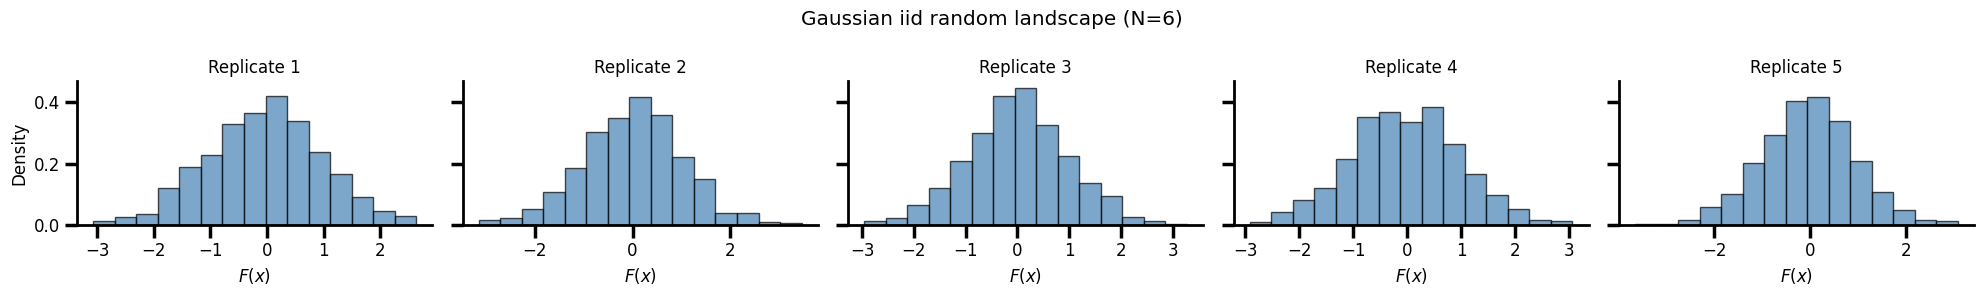

In [16]:
# Example: visualize the distribution of each replicate
fig, axes = plt.subplots(1, R, figsize=(4*R, 3), sharey=True)

for r in range(R):
    ax = axes[r] if R > 1 else axes
    ax.hist(L.values[:, r], bins=15, color="steelblue", alpha=0.7, edgecolor="black",density=True)
    ax.set_title(f"Replicate {r+1}")
    ax.set_xlabel(r"$F(x)$")
    if r == 0:
        ax.set_ylabel("Density")

plt.suptitle("Gaussian iid random landscape (N=6)")
plt.tight_layout()
plt.show()

Now we can visualize how the epistatic coefficients are distributed across different interaction orders. For this, we use the function `epistasis_distributions_by_order` from the `epistasis` module, which computes **all epistatic coefficients for all orders in all backgrounds simultaneously**.

For each order $k$, the number of coefficients is given by the combinatorial factor (corresponding to the number of possible combinations of $k$ interacting loci) multiplied by the total number of posible backgrounds
\begin{equation}
\text{comb}(N, k)\times2^{N-k}.
\end{equation}
In the plots below, we show the histograms of the $\varepsilon$ --values for each order. Some distributions, especially at very low or very high orders, may display irregular or “pathological” shapes — this happens because there are too few coefficients to build a smooth histogram.  When the number of coefficients is sufficiently large, the distributions appear approximately **Gaussian**, as expected for random (iid) landscapes.

/tmp/ipykernel_590049/3705447364.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("viridis",n_orders)


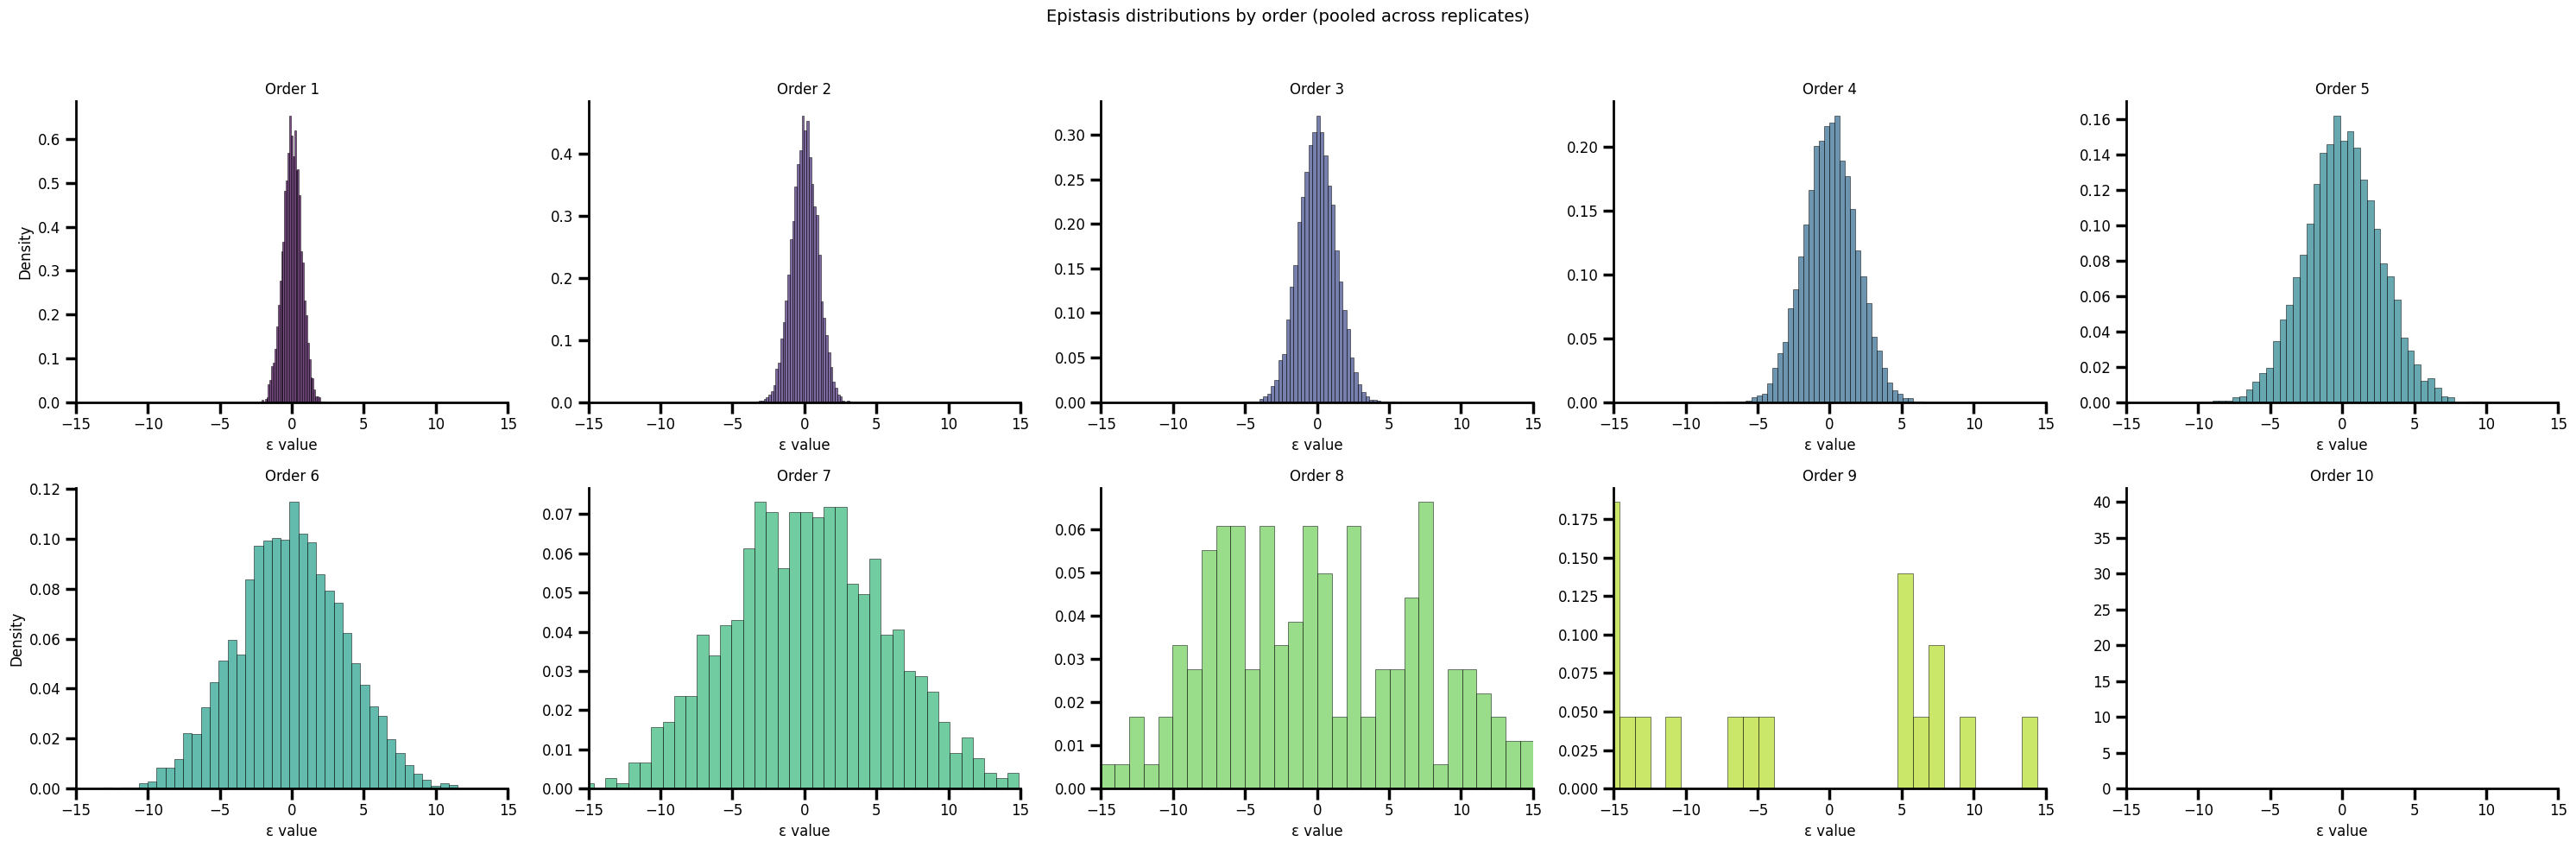

In [17]:
from matplotlib import cm

#Mean values
F = L.mean_over_replicates()

# 1) Compute distributions (returns EpistasisDists with .pooled and .per_replicate)
global_epsilon = ep.epistasis_distributions_by_order(F, N)

# 2) Use the pooled view: dict[S] -> 1D array with all ε concatenated
dists = global_epsilon.pooled

orders = sorted(dists.keys())
n_orders = len(orders)

# 3) Two rows, as many columns as needed
n_cols = int(np.ceil(n_orders / 2))

# 4) Flexible colormap (no deprecation warning)
cmap = cm.get_cmap("viridis",n_orders)

fig, axes = plt.subplots(2, n_cols, figsize=(6 * n_cols, 10), sharey=False)
axes = np.atleast_1d(axes).ravel()

for i, S in enumerate(orders):
    eps_vals = dists[S]  # pooled ε for order S
    ax = axes[i]
    ax.hist(
        eps_vals,
        bins=40,
        density=True,
        color=cmap(i),
        alpha=0.7,
        edgecolor="black",
        linewidth=0.5
    )
    ax.set_title(f"Order {S}")
    ax.set_xlabel("ε value")
    if i % n_cols == 0:
        ax.set_ylabel("Density")
    
    ax.set_xlim(-15,15)

# 5) Hide unused subplots (if n_orders is odd)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Epistasis distributions by order (pooled across replicates)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Observe that the **variance of the distributions**, reflected in the spread along the horizontal axis, increases systematically with interaction order. This behavior is a direct consequence of the way local epistatic coefficients are constructed: each coefficient $\varepsilon$ is obtained by combining $2^{k}$ phenotypic measurements corresponding to the vertices of a $k$-dimensional hypercube. As a result, the variance of $\varepsilon$ grows with order, even in the absence of any underlying biological structure.

To make this scaling more explicit, in the next example we compute and visualize the **standard deviation** of the epistatic coefficient distributions as a function of interaction order. This provides a quantitative illustration of how local epistasis becomes increasingly noisy at higher orders, purely due to combinatorial amplification of measurement noise.


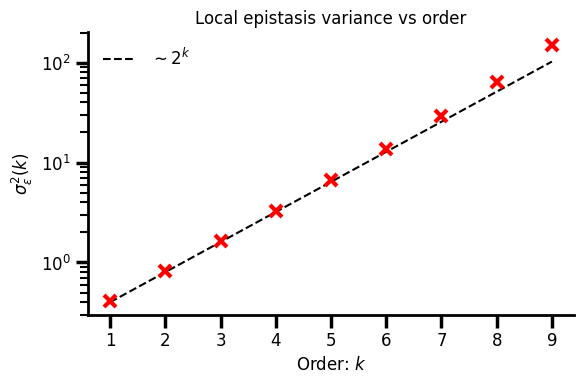

In [18]:
sigma_xi_iid = cfg.sigma  # noise amplitude used in the landscape generation

# Compute variance by orders
orders = sorted(dists.keys())
orders = [S for S in orders if S < N]  # drop last order
var_by_S = np.array([np.var(dists[S], ddof=1) for S in orders])

# log-scale y-axis to highlight ~2^k growth (iid Gaussian intuition)
plt.figure(figsize=(6, 4))
plt.plot(orders, var_by_S, "x", ms=8, markeredgewidth=3, color="red",zorder=2)
plt.plot(orders,2**np.array(orders)*sigma_xi_iid**2/R,color="k",linestyle="--",label=r"$\sim 2^k$",zorder=0) #R diving is included since the the variance is computed 
plt.yscale("log")                                                                                                   #from varepsilon instead of the mean landscape
plt.xlabel(r"$\text{Order: } k$")
plt.ylabel(r"$\sigma^2_\varepsilon (k)$")
plt.title("Local epistasis variance vs order")
plt.legend(frameon=False)
plt.tight_layout()
plt.show()

As discussed above, Walsh–Hadamard (WH) coefficients provide a natural representation of background-averaged epistatic interactions. Rather than repeating the formal derivation, here we focus on their interpretation in the context of **random landscapes**, which serve as a reference null model in the absence of biological structure.

For a given interaction order $k$, the relevant quantity is the second moment of the interaction strengths across all subsets of size $k$, $\langle \mathcal{E}^2 \rangle_k$, often referred to as the **epistasis amplitude**. This quantity enters the order-wise functional variance spectrum as $V(k) = 4^{-k}\binom{N}{k}\,\langle \mathcal{E}^2 \rangle_k$.

In random landscapes with unstructured fluctuations across configurations, $\langle \mathcal{E}^2 \rangle_k$ can be predicted analytically for simple ensembles and is observed to grow systematically with interaction order. Importantly, this growth does not reflect genuine high-order biological interactions, but instead arises from the combinatorial accumulation of noise across the $2^k$ vertices of a $k$-dimensional hypercube.

In practice, this behavior is captured numerically by the variance decomposition routine, which extracts an order-dependent interaction factor $U(k)$ directly from the WH coefficients. In random landscapes, $U(k)$ follows the theoretical scaling predicted by the null model, providing a baseline against which deviations observed in empirical landscapes can be meaningfully interpreted.

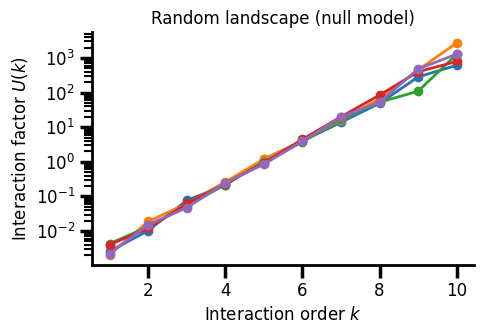

In [19]:
# 1) Compute WH coefficients
fs, s_bits, orders, meta = ep.wh_transform(L.values, states=L.states, N=N)

# 2) Variance decomposition
var_dec = ep.variance_decomposition(fs, orders, N=L.N)

# 3) Extract U(k)
k_list = sorted(var_dec.keys())
U = np.array([var_dec[k]["U"] for k in k_list]).squeeze()

# 4) Plot
plt.figure(figsize=(5, 3.5))
plt.plot(k_list, U, "o-", lw=2)

plt.yscale("log")
plt.xlabel(r"Interaction order $k$")
plt.ylabel(r"Interaction factor $U(k)$")
plt.title("Random landscape (null model)")
plt.tight_layout()
plt.show()


The next example illustrates the **null behavior** of the variance spectrum and of the epistasis amplitude across interaction orders. In particular, it allows us to verify that the systematic increase of interaction strength with order persists even in the absence of any underlying biological interactions, and to quantify the corresponding uncertainty and null fluctuations using bootstrap
procedures.

By construction, any apparent high-order structure observed in this landscape must arise solely from combinatorial amplification of measurement noise. The results therefore provide a reference baseline against which empirical landscapes can be meaningfully compared in subsequent sections.

30


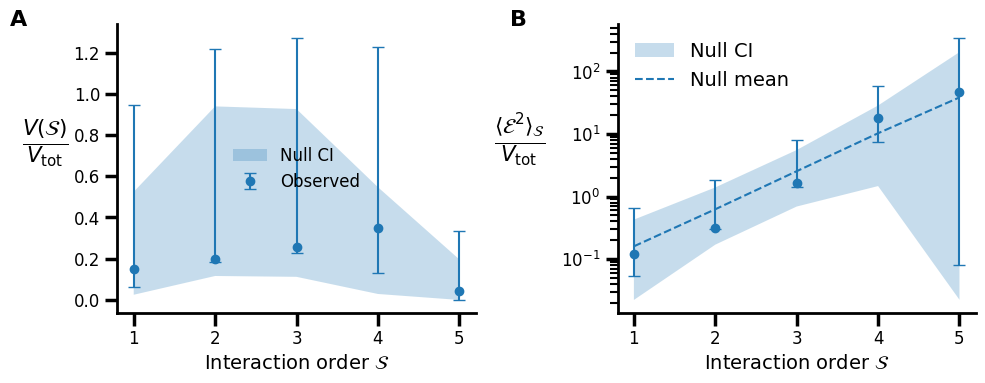

In [20]:
N=5 # Number of loci
R=30 # Replics

# Define the synthetic landscape configuration
cfg = ep.GaussianRandomConfig(
    N=N,
    R=R,
    seed=42,
    mean=0,
    sigma=0.1,    # iid Gaussian noise amplitude
    batch=False   # no batch effects
)

# Sample the landscape
L, meta = cfg.sample()
L.values[0,:] = 0.0
print(L.R)

fig, axes, data = ep.plot_variance_and_amplitude(
    L,
    B_uncertainty=1000,
    B_null=1000,
    as_fraction=True,
    show_components=False,
    rng=np.random.default_rng(125),
    return_data=True,
    figsize=(10, 4),
    ci_method_uncertainty = "percentile"  # {"percentile","studentized","bca"}
)

The apparent mismatch between the null bootstrap confidence interval and the uncertainty confidence interval does not indicate a methodological inconsistency, but rather a finite-sampling effect. By construction, the null bootstrap enforces the hypothesis $\bar{F}(\mathbf{x}) = 0$, corresponding to a landscape with no biological signal, and is therefore centered exactly at zero.

In contrast, the uncertainty confidence interval is built around the empirical estimate of $\bar{F}(\mathbf{x})$, obtained from a finite number $R$ of replicates. In random Gaussian landscapes, this empirical mean fluctuates around zero with a standard deviation scaling as $R^{-1/2}$, leading to a small but systematic offset that vanishes in the limit $R \to \infty$.

We then compute the **epistasis amplitude** across interaction orders using `epistasis_amplitude`, together with both uncertainty and null bootstraps. In this setting, any apparent order-dependent structure should be interpreted as a null baseline shaped by combinatorial effects and finite-$R$ variability, rather than genuine biological interactions.

In [21]:
N=10 # Number of loci
R=5 # Replics

# Define the synthetic landscape configuration
cfg = ep.GaussianRandomConfig(
    N=N,
    R=R,
    seed=42,
    mean=0.0,
    sigma=1,    # iid Gaussian noise amplitude
    batch=False   # no batch effects
)

# Sample the landscape
L, meta = cfg.sample()
L.values[0,:] = 0.0
print(L.R)

df_Ea = ep.epistasis_amplitude(
    L,
    B_uncertainty=1000,
    B_null=1000,
    rng=np.random.default_rng(12345),
    ci_method_uncertainty = "percentile"  # {"percentile","studentized","bca"}
)
display(df_Ea)

5


,Order,Epistasis amplitude <E^2>_k,CI low,CI high,Null CI low,Null CI high,SNR (null),Null mean,Variance (obs),Variance (null median),P-value order,P-value var
0,1,0.000988,0.000694,0.003859,0.000090,0.002314,1.590459,0.000775,0.000988,0.000604,0.280,0.135
1,2,0.002922,0.003094,0.011710,0.000485,0.008817,1.383406,0.003091,0.002922,0.002650,0.444,0.135
2,3,0.013431,0.014860,0.044169,0.002030,0.032356,1.678196,0.012343,0.013431,0.010943,0.374,0.135
3,4,0.056603,0.062551,0.178191,0.008216,0.124484,1.807552,0.049415,0.056603,0.044549,0.342,0.135
4,5,0.208609,0.236227,0.692540,0.036743,0.508631,1.648331,0.197027,0.208609,0.176120,0.398,0.135
5,6,0.717389,0.818457,2.713524,0.139093,2.028082,1.423049,0.788346,0.717389,0.701723,0.484,0.135
6,7,3.222392,3.597492,11.343689,0.524738,8.033885,1.599642,3.148006,3.222392,2.783516,0.409,0.135
7,8,14.699704,15.116309,49.887733,1.985423,33.212088,1.759068,12.634093,14.699704,11.072752,0.338,0.135
8,9,42.105689,34.003902,232.091030,5.978300,157.607547,0.982335,51.508250,42.105689,38.901774,0.470,0.135
9,10,450.542227,6.164237,2630.521301,0.117859,1330.601582,1.161427,204.414271,450.542227,65.395353,0.118,0.135


The table above summarizes the **epistasis amplitude** $\langle \mathcal{E}^2\rangle_k$ across interaction orders for a purely random Gaussian landscape with a small number of replicates ($R=5$). As expected from the null model, the epistasis amplitude increases rapidly with interaction order, reflecting the combinatorial amplification of unstructured noise rather than genuine biological interactions.

Crucially, the observed estimates remain statistically consistent with the null prediction across all orders: the null confidence intervals closely overlap the uncertainty intervals (deviations come from finite sampling effects), the signal-to-null ratios remain of order unity, and the order-wise $p$-values do not indicate significant excess variance. This example illustrates how large apparent high-order epistasis can arise in random landscapes when $R$ is small, and highlights the importance of null comparisons for interpreting epistatic structure in empirical data.

## 5.3. Parametric vs. wild bootstrap consistency test

To validate that our wild (residual-based) bootstrap provides reliable uncertainty estimates for the epistasis amplitude, we perform a controlled test on a fully synthetic Gaussian i.i.d. landscape. In this setting the generative model is known exactly: for each configuration $x$ and replicate $r$, we sample $F(x,r) \sim \mathcal{N}(0,\sigma^2)$. This allows us to compare two uncertainty
estimators:

- **Wild bootstrap**: the non-parametric procedure used throughout the package,
  which resamples replicate-level residuals and propagates noise through the
  Walsh–Hadamard analysis pipeline.

- **Parametric bootstrap**: the ground-truth procedure for this synthetic
  setting, obtained by repeatedly sampling new datasets from the known Gaussian
  model and recomputing the epistasis amplitude for each sample.

Because the parametric bootstrap must estimate tail quantiles of the amplitude distribution order by order, it requires a sufficiently large number of replicates $R$ (and bootstrap draws) to stabilize the confidence intervals, especially at high interaction orders where variance is strongly amplified. In practice, we observe that the wild bootstrap produces slightly wider (more conservative) confidence intervals than the parametric bootstrap, while remaining consistent with it across orders. This agreement supports that the wild bootstrap correctly captures noise propagation in the Walsh–Hadamard basis.

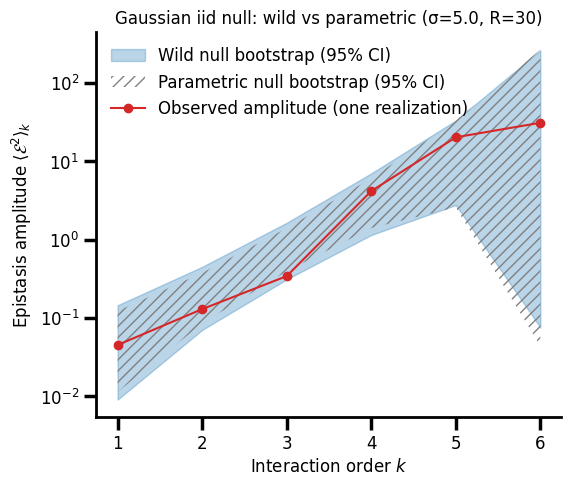

In [22]:
df_wild, df_param = ep.test_gaussian_bootstrap_consistency(
    N=6,
    R=30,
    sigma=5.0,
    B_wild=1000,
    B_param=1000,
    ci_level=0.95,
    seed_landscape=42,
    seed_wild=125,
    seed_param=777,
    show=True,
)

## 5.4. Flat epistatic landscapes and recoverability tests

To disentangle the role of combinatorics from that of interaction strength, we consider a class of synthetic landscapes with **uniform epistatic amplitude across interaction orders**, referred to as *flat epistatic landscapes*. In these maps, all interaction orders $k = 1,\dots,N$ have the same typical interaction strength,

\begin{equation}
\langle \mathcal{E}_k^2 \rangle = K^2, 
\end{equation} 
 
so that no order is intrinsically stronger or weaker than the others at the level of background-averaged epistasis. This condition is enforced in the Walsh–Hadamard representation by sampling coefficients with zero mean and order-dependent variance 

\begin{equation}
\text{Var}(f_{\mathbf{s}}) = K^2\,4^{-|\mathbf{s}|}.
\end{equation}

As a result, the associated background-averaged interactions $\mathcal{E}_{\mathbf{s}} = 2^{|\mathbf{s}|} f_{\mathbf{s}}$ have constant variance across orders, while the order-wise functional variance

\begin{equation}
V(k) = 4^{-k}\binom{N}{k}\langle \mathcal{E}_k^2 \rangle
\end{equation}
 
remains purely shaped by combinatorial factors. Flat epistatic landscapes therefore provide a controlled **ground-truth system** in which epistatic interactions of all orders are present with equal strength. Any structure observed in the variance spectrum arises solely from geometry and entropy, rather than from a hierarchy of interaction strengths, making these landscapes a natural benchmark for inference.

To assess the recoverability of epistatic interactions, we combine this flat signal with synthetic noise, such as i.i.d.\ Gaussian noise, wild (residual-based) noise, or correlated multivariate Gaussian noise. The resulting mixed landscape $F_{\mathrm{mix}}(\mathbf{x}) = F_{\mathrm{flat}}(\mathbf{x}) + F_{\mathrm{noise}}(\mathbf{x})$ mimics realistic measurement conditions while preserving a known ground truth.

By varying the noise amplitude and the number of replicates, we quantify up to which interaction order $k$ the epistasis amplitude $\langle \mathcal{E}_k^2 \rangle$ can be distinguished from the bootstrap null distribution. As noise increases—or the number of replicates decreases—the higher-order signal is progressively masked, and the observed variance spectrum becomes dominated by noise, defining a practical limit of detectability.

In [ ]:
# ----------------------------------------------------------------------
# Parameters controlling the synthetic test
# ----------------------------------------------------------------------
N = 10
R_list = [3, 10, 20]            # rows
noise_list = [0.5, 2, 5]    # columns

B = 100                         # bootstrap samples (use >=200 to reduce jitter)
seed_signal = 1111
seed_noise = 2222
seed_bootstrap = 3333

K2 = 1                         # this is "amplitude" = K^2 in FlatEpistasisConfig

# Signal-only theoretical fraction:  <E^2>_k / Vtot  = K^2 / [K^2((5/4)^N - 1)]
Vtot_signal_theory = K2 * ((5/4)**N - 1.0)
flat_fraction_theory = K2 / Vtot_signal_theory  # constant in k (signal-only)

# ----------------------------------------------------------------------
# Prepare the figure grid
# ----------------------------------------------------------------------
fig, axes = plt.subplots(
    len(R_list), len(noise_list),
    figsize=(12, 9),
    sharex=True, sharey=True
)

for i, R in enumerate(R_list):
    for j, noise_sigma in enumerate(noise_list):
        ax = axes[i, j]

        # --------------------------------------------------------------
        # 1) Signal: flat epistasis (R=1 is fine; combine_landscapes should broadcast)
        # --------------------------------------------------------------

        gen = ep.FlatEpistasisConfig()
        L_signal, meta = gen.sample(N=N, R=1, K=np.sqrt(K2))

        # --------------------------------------------------------------
        # 2) Noise: Gaussian iid across states (R replicates)
        # --------------------------------------------------------------
        cfg_noise = ep.GaussianRandomConfig(
            N=N,
            R=R,
            mean=0.0,
            sigma=noise_sigma,
            batch=False,
            seed=seed_noise
        )
        L_noise, _ = cfg_noise.sample()

        # --------------------------------------------------------------
        # 3) Mix: signal + noise
        # --------------------------------------------------------------
        L_mix = ep.combine_landscapes(
            L_signal,
            L_noise,
            w_signal=1.0,
            w_noise=1.0
        )

        # --------------------------------------------------------------
        # 4) Compute amplitude stats (already normalized if as_fraction=True)
        # --------------------------------------------------------------
        rng_panel = np.random.default_rng(seed_bootstrap + 1000*i + 10*j)

        _, _, data = ep.plot_variance_and_amplitude(
            L_mix,
            B_uncertainty=B,
            B_null=B,
            as_fraction=False,              # <-- key: returns <E^2>_k / Vtot directly
            show_components=False,
            multipliers="normal",          # iid Gaussian multipliers for wild bootstrap
            uncertainty_flavor="wildcluster",
            rng=rng_panel,
            return_data=True,
            show=False
        )

        df = data["amplitude"]
        k = df["Order"].values

        A_obs      = df["Epistasis amplitude <E^2>_k"].values
        A_ci_low   = df["CI low"].values
        A_ci_high  = df["CI high"].values
        A_null_low = df["Null CI low"].values
        A_null_high= df["Null CI high"].values
        A_null_mean= df["Null mean"].values

        # --------------------------------------------------------------
        # 5) Plot
        # --------------------------------------------------------------
        # Null band + null mean
        ax.fill_between(k, A_null_low, A_null_high, alpha=0.25, label="Null CI" if (i==0 and j==0) else None)
        ax.plot(k, A_null_mean, "--", lw=1.5, label="Null mean" if (i==0 and j==0) else None)

        # Observed with uncertainty CI as error bars
        yerr_low  = np.clip(A_obs - A_ci_low, 0, None)
        yerr_high = np.clip(A_ci_high - A_obs, 0, None)
        ax.errorbar(k, A_obs, yerr=[yerr_low, yerr_high], fmt="o", ms=4, capsize=3, color="red",
                    label="Observed" if (i==0 and j==0) else None)

        # Signal-only flat theory (horizontal)
        ax.axhline(K2, lw=2, label="Flat theory (signal-only)" if (i==0 and j==0) else None,color="orange")

        # Cosmetics
        if i == 0:
            ax.set_title(f"Noise σ = {noise_sigma}", fontsize=13)

        if j == len(noise_list) - 1:
            ax2 = ax.twinx()
            ax2.set_ylabel(f"R={R}", rotation=270, labelpad=25, fontsize=16)
            ax2.set_yticks([])

        ax.set_yscale("log")
        ax.set_xlim(1, N + 0.1)

# Global labels
fig.supxlabel("Order $k$", fontsize=16)
fig.supylabel(r"$\langle\mathcal{E}^2\rangle_k$", fontsize=18)
#fig.suptitle("Flat epistasis + Gaussian noise: epistasis amplitude", fontsize=14)
axes[0, 0].legend(frameon=False, fontsize=11, loc="best")
fig.tight_layout()
fig.savefig("/home/jose/FunEcoLab_IBFG Dropbox/Noise/Figures_SI/SignalRecovery.pdf", format="pdf", dpi=300)
plt.show()